In [1]:
# Using the GREYC keystroke dataset from http://www.vmonaco.com/keystroke-datasets
import pandas as pd;
import numpy as np;
import os;

In [2]:
# Get key presses and releases on the password entry task for genuine and impostor users

genuine_list_press=[];
impostor_list_press=[];
genuine_list_release=[];
impostor_list_release=[];

for root, dirs, files in os.walk("data/user_001", topdown=False):
    for subdir in dirs:
        try:
            if "genuine" in root:
                genuine_list_press.append(open(os.path.join(root,subdir)+"/p_raw_press.txt").readlines())
                genuine_list_release.append(open(os.path.join(root,subdir)+"/p_raw_release.txt").readlines())
            else:
                imposter_list_press.append(open(os.path.join(root,subdir)+"/p_raw_press.txt").readlines())
                imposter_list_release.append(open(os.path.join(root,subdir)+"/p_raw_release.txt").readlines())
#         ignore files that aren't timestampped keystroke data
        except: 
            pass;

In [3]:
keymap={8:"Backspace", 9:"Tab", 13:"Enter", 16:"Shift", 17:"Control", 18:"Alt",
    19:"Pause", 20:"CapsLock", 27:"Esc", 32:"Spacebar", 33:"PageUp",
    34:"PageDown", 35:"End", 36:"Home", 37:"Left", 38:"Up", 39:"Right",
    40:"Down", 45:"Insert", 46:"Del",
    48:"0",49:"1",50:"2",51:"3",52:"4",53:"5",54:"6",55:"7",56:"8",57:"9",
    65:"A", 66:"B", 67:"C", 68:"D", 69:"E", 70:"F", 71:"G", 72:"H", 73:"I",
    74:"J", 75:"K", 76:"L", 77:"M", 78:"N", 79:"O", 80:"P", 81:"Q", 82:"R",
    83:"S", 84:"T", 85:"U", 86:"V", 87:"W", 88:"X", 89:"Y", 90:"Z", 97:"NUMPAD_1", 98:"NUMPAD_2", 99:"NUMPAD_3", 105:"NUMPAD_9", 186:";",
    189:"-", 187:"=", 222:"'", 191:"/", 188:",", 190:"."};

In [4]:
def parseKeystrokes(the_dataset):
#     return list of key/timestamp tuples for each trial 
    return [[(keymap[int(n.split(" ")[0])], n.split(" ")[1].replace("\n","")) for n in the_dataset[k]] for k in range(0,len(the_dataset))]

In [5]:
parsed_genuine_presses = parseKeystrokes(genuine_list_press)
parsed_genuine_releases = parseKeystrokes(genuine_list_release)
parsed_impostor_presses = parseKeystrokes(impostor_list_press)
parsed_impostor_releases = parseKeystrokes(impostor_list_release)

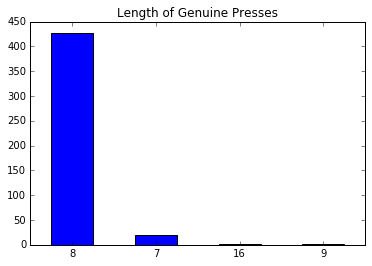

In [6]:
%matplotlib inline
pd.Series([len(x) for x in parsed_genuine_presses]).value_counts().plot(kind='bar', rot=0, title="Length of Genuine Presses")

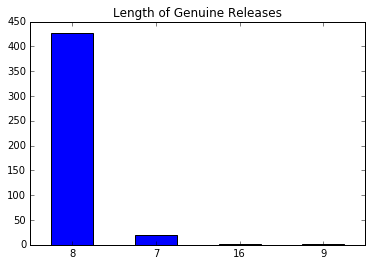

In [7]:
pd.Series([len(x) for x in parsed_genuine_releases]).value_counts().plot(kind='bar', rot=0, title="Length of Genuine Releases")

In [8]:
def labelTheKeystrokes(parsedData,action):
        labeled = [];
        for k in parsedData:
            temp = [];
            for n in k:
                temp.append(n+(action,));
            labeled.append(temp);
        return labeled;
            
            
parsed_genuine_releases_labeled = labelTheKeystrokes(parsed_genuine_releases, "RELEASE");
parsed_genuine_presses_labeled = labelTheKeystrokes(parsed_genuine_presses, "PRESS");


In [9]:
# A single trial of keypresses & releases in the order they occured
pd.DataFrame(parsed_genuine_presses_labeled[0]+parsed_genuine_releases_labeled[0]).sort_values([1])

,0,1,2
0,C,1287395362761,PRESS
1,Shift,1287395362825,PRESS
8,C,1287395362856,RELEASE
2,P,1287395362969,PRESS
9,Shift,1287395363016,RELEASE
10,P,1287395363064,RELEASE
3,C,1287395363113,PRESS
11,C,1287395363184,RELEASE
4,NUMPAD_9,1287395363489,PRESS
12,NUMPAD_9,1287395363560,RELEASE
